# <center> Word Embeddings
![](https://github.com/CenticMurcia/curso-ciencia-datos/blob/master/07.%20NLP/img/embeddings.png?raw=1)

In [0]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from tqdm import tqdm_notebook as tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Need to load the large model to get the vectors
# python -m spacy download en_core_web_lg
nlp   = spacy.load('en_core_web_sm')
#nlp_lg = spacy.load('en_core_web_lg')

# Toy Example

In [22]:
text = "These vectors can be used as features for machine learning models. January February dog cat. Vector summer august holidays vacances"

tokens      = []
vectors     = []
has_vector  = []
for token in nlp(text):
    tokens.append(token)
    has_vector.append(token.has_vector)
    vectors.append(token.vector)

result = pd.DataFrame({'Token': tokens, 'Has vector?': has_vector, 'Vector': vectors })

vectors = np.array(vectors)
print(vectors.shape)
result

(22, 96)


,Token,Has vector?,Vector
0,These,True,"[-1.2537801, -2.080269, -3.6098287, 0.7086129,..."
1,vectors,True,"[8.081641, 5.4852214, 0.6335453, -4.993907, -3..."
2,can,True,"[-1.2973154, 1.6048589, -1.169414, -1.3815181,..."
3,be,True,"[0.82684475, 9.059795, -2.0595188, -0.8357834,..."
4,used,True,"[-2.6992192, 1.1200027, -2.78239, -3.782133, 2..."
5,as,True,"[-3.1869457, -1.0132989, -4.9872975, 0.9926262..."
6,features,True,"[4.5000443, 1.5377319, 1.5207628, -3.377181, 5..."
7,for,True,"[-2.832121, -2.762258, -5.1766653, -3.3389711,..."
8,machine,True,"[3.1701212, -2.989676, -0.35837048, -0.0229363..."
9,learning,True,"[0.832567, -0.97080874, -1.6423382, 1.0783331,..."


#### Embedding Dimensonality Reduction

In [0]:
#tecnicas de reducción de dimensionalidad: pasamos de 96 a 2 dimensiones
vectors_pca  = PCA(n_components=2).fit_transform(vectors)
vectors_tsne = TSNE(n_components=2).fit_transform(vectors)

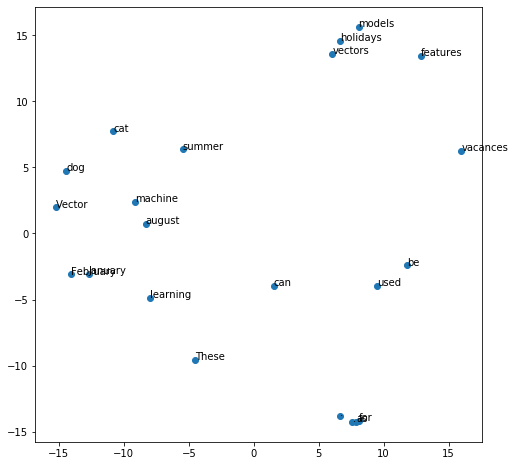

In [24]:
vectors_dimRed = vectors_pca

plt.figure(figsize=(8,8))
x = vectors_dimRed[:,0]
y = vectors_dimRed[:,1]
plt.scatter(x, y);

for i, txt in enumerate(tokens):
    plt.annotate(str(txt), (x[i], y[i]))

# Read data

In [25]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./data "https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/4. NLP/data/movieReviews_trainLabel.tsv"

--2020-02-18 15:20:26--  https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/4.%20NLP/data/movieReviews_trainLabel.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33556378 (32M) [text/plain]
Saving to: ‘./data/movieReviews_trainLabel.tsv’

movieReviews_trainL 100%[===================>]  32.00M  39.6MB/s    in 0.8s    

2020-02-18 15:20:32 (39.6 MB/s) - ‘./data/movieReviews_trainLabel.tsv’ saved [33556378/33556378]



In [0]:
# Loading the spam data
# ham is the label for non-spam messages
df = pd.read_csv("data/movieReviews_trainLabel.tsv", sep="\t", index_col="id")

# Only top 1000
df = df.sample(1000, random_state=0)

In [27]:
df.head(1)

,sentiment,review
id,,
11311_4,0,I vaguely remember Ben from my Sci-Fi fandom d...


# Reviews to embeddings

In [28]:
# como chapuza hacemos que los 1000 primeros textos convertimos cada texto en un vector de 96 dimensiones
embeddings = []

with nlp.disable_pipes():
    for text in tqdm(df.review):
        embeddings.append(nlp(text).vector)
    
embeddings = np.array(embeddings)
embeddings.shape

(1000, 96)

In [31]:
embeddings

array([[-0.00537297, -0.5422956 , -1.2885221 , ...,  0.89032954,
        -0.32715878,  0.20121668],
       [-0.0926141 , -0.92889434, -0.9005032 , ...,  0.8548509 ,
        -0.75760007,  0.0105494 ],
       [ 0.34322533, -1.0647011 , -1.0134128 , ...,  0.6700674 ,
        -0.7203888 ,  0.26673836],
       ...,
       [ 0.3561945 , -0.71788526, -0.9912305 , ...,  0.78445727,
        -0.75963825, -0.21932968],
       [ 0.141381  , -1.150785  , -1.2756172 , ...,  0.7367597 ,
        -0.59144366, -0.06282651],
       [ 0.42572168, -1.1617149 , -1.3147128 , ...,  0.52857155,
        -0.73042184,  0.37066334]], dtype=float32)

# Split data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(embeddings, df["sentiment"],
                                                    test_size=0.2, shuffle=True, random_state=0)

# Model: Linear Support Vector Machine

In [33]:
# Set dual=False to speed up training, and it's not needed
model = LinearSVC(random_state=1, dual=False, max_iter=10000)
model.fit(x_train, y_train)
print(f"Accuracy: {model.score(x_test, y_test) * 100:.3f}%", )

Accuracy: 62.500%
